# Assignment-1: Present the different types of feature selection, extraction, and visualization techniques for image processing.

**Image Upload and Preparation:**

**Purpose:** To load an image from the local system and prepare it for various feature extraction techniques.

**Functionality:** The image is initially read using OpenCV, which loads it in BGR color space by default.

It is converted to RGB format for accurate visualization and display, particularly when using matplotlib.

A grayscale version of the image is also created to support algorithms that require single-channel inputs (e.g., edge detection, LBP).

**Applications:** Acts as the foundational preprocessing step before applying different computer vision and image analysis techniques.

Ensures compatibility across different feature extraction methods by providing both color and grayscale versions.

Used in pipelines for image classification, object detection, and pattern recognition.

Upload your image file:


Saving ML.webp to ML (5).webp


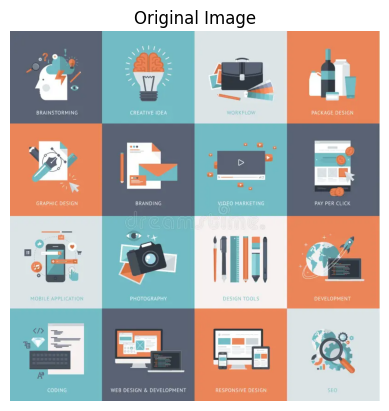

In [92]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Step 1: Upload the image
print("Upload your image file:")
uploaded = files.upload()

# Step 2: Load the uploaded image
image_path = list(uploaded.keys())[0]  # Get the file name
image = cv2.imread(image_path)  # Load image in BGR format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to Grayscale

# Step 3: Display the original image
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()


**Feature-1: Color Histogram**

**Technique:** Color Histogram

**Purpose:** The distribution of pixel intensities for each color channel (Red, Green, and Blue) is analyzed.

**Functionality:**

Histograms are calculated for each color channel (RGB) using cv2.calcHist.

These histograms show the frequency of pixel intensities in each channel.

The histograms for the Red, Green, and Blue channels are plotted to visually represent how the color intensities are distributed in the image.

**Applications:**

Image retrieval: Helps in searching for similar images based on color distribution.

Color-based classification or segmentation: Identifies and segments objects in the image based on dominant color features.

Dominant color detection: Useful for applications like identifying key colors in an image, which is important in areas like image-based search and marketing.

In [93]:
import cv2
import matplotlib.pyplot as plt

# Function to extract and visualize color histogram
def extract_color_histogram(image_rgb):
    # Plot original image and color histogram
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Show original image
    axes[0].imshow(image_rgb)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # Plot histogram for each color channel
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
        axes[1].plot(hist, color=color)

    axes[1].set_xlim([0, 256])
    axes[1].set_title("Color Histogram")
    axes[1].set_xlabel("Pixel Intensity")
    axes[1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()


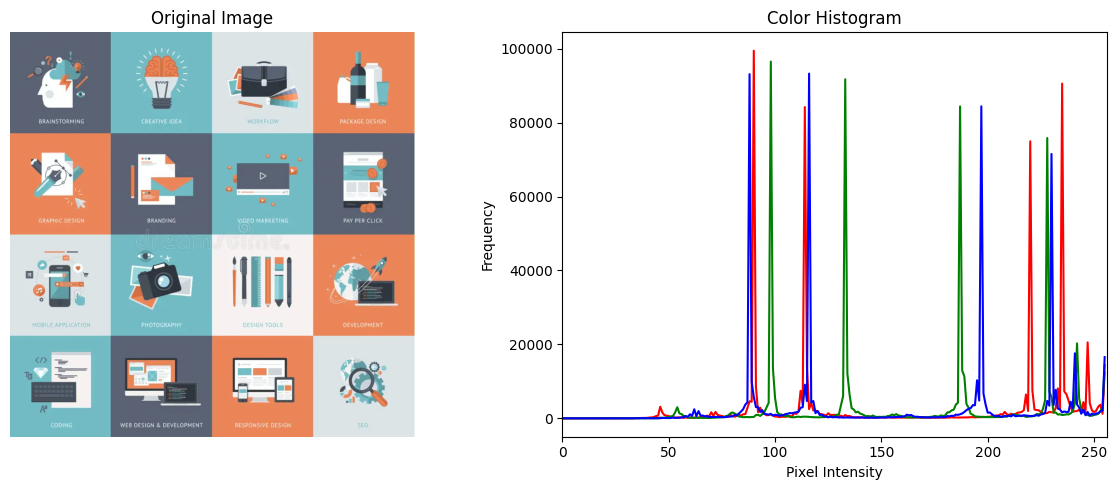

In [94]:
    # Run the function
    extract_color_histogram(image_rgb)

**Feature-2: Edge Detection (Canny)**

**Technique:** Canny Edge Detection

**Purpose:** The boundaries of objects in the image are identified by detecting regions where there are sharp changes in intensity (edges).

**Functionality:**

The Canny edge detector works by applying a multi-stage algorithm:

Noise Reduction: Gaussian blur is applied to the image to reduce noise.

Gradient Calculation: The intensity gradient of the image is calculated to find areas where intensity changes rapidly (edges).

Non-Maximum Suppression: Thin out the edges to create a more precise edge map.

Edge Tracing by Hysteresis: Strong edges are kept, while weak edges that are not connected to strong edges are discarded.

The final result is a binary image where the edges are highlighted.

**Applications:**

Object detection: Identifying the shapes and boundaries of objects in an image.

Contour extraction: Useful for shape analysis and finding the contours of objects for further analysis.

Lane detection: In autonomous vehicles, Canny edge detection is used to detect lane markings on roads.

Image segmentation: Detecting boundaries between different regions in an image.

In [95]:
import cv2
import matplotlib.pyplot as plt

# Function to extract and visualize edges using Canny
def extract_edges(gray_image):
    # Perform Canny edge detection
    edges = cv2.Canny(gray_image, 100, 200)

    # Plot original grayscale and edge-detected images
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Show grayscale image
    axes[0].imshow(gray_image, cmap='gray')
    axes[0].set_title("Grayscale Image")
    axes[0].axis('off')

    # Show edge-detected image
    axes[1].imshow(edges, cmap='gray')
    axes[1].set_title("Canny Edge Detection")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()




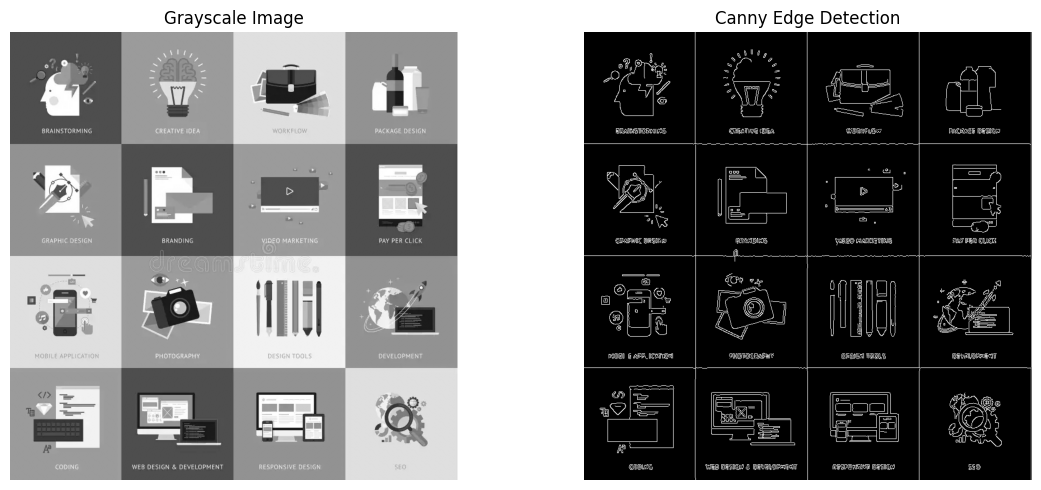

In [96]:
# Run the function
extract_edges(gray_image)

**Feature-3: Texture Features (LBP)**

**Technique:** Local Binary Patterns (LBP)

**Purpose:** Extracts texture information from an image by comparing the intensity of each pixel with its surrounding neighbors.

**Functionality:**

Local Binary Patterns (LBP) work by encoding the local texture of an image based on pixel intensity comparisons:

For each pixel in the image, the intensity values of its neighbors are compared to the central pixel.

If the neighbor’s intensity is greater than or equal to the center, it’s assigned a value of 1; otherwise, it’s 0.

A binary number is formed from these comparisons, and it is used as a representation of the local texture pattern for the pixel.

LBP is calculated over a neighborhood of pixels, and the resulting pattern is used to create a texture feature map.

**Applications:**

Texture classification: Used in identifying and classifying patterns or textures in images, such as distinguishing between rough and smooth surfaces.

Facial recognition: LBP is particularly useful in recognizing unique facial textures for identity verification.

Surface inspection: In manufacturing, LBP can detect surface defects or variations in texture that are not visible to the naked eye.

Image segmentation: LBP helps in segmenting images based on texture patterns for more accurate object recognition or analysis.



In [97]:
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

# Function to extract and visualize texture features using LBP
def extract_texture_features(gray_image):
    # Parameters for LBP
    radius = 1
    n_points = 8 * radius

    # Compute LBP image
    lbp = local_binary_pattern(gray_image, n_points, radius, method="uniform")

    # Plot grayscale and LBP images
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Show grayscale image
    axes[0].imshow(gray_image, cmap="gray")
    axes[0].set_title("Grayscale Image")
    axes[0].axis('off')

    # Show LBP image
    axes[1].imshow(lbp, cmap="gray")
    axes[1].set_title("LBP Texture Features")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()



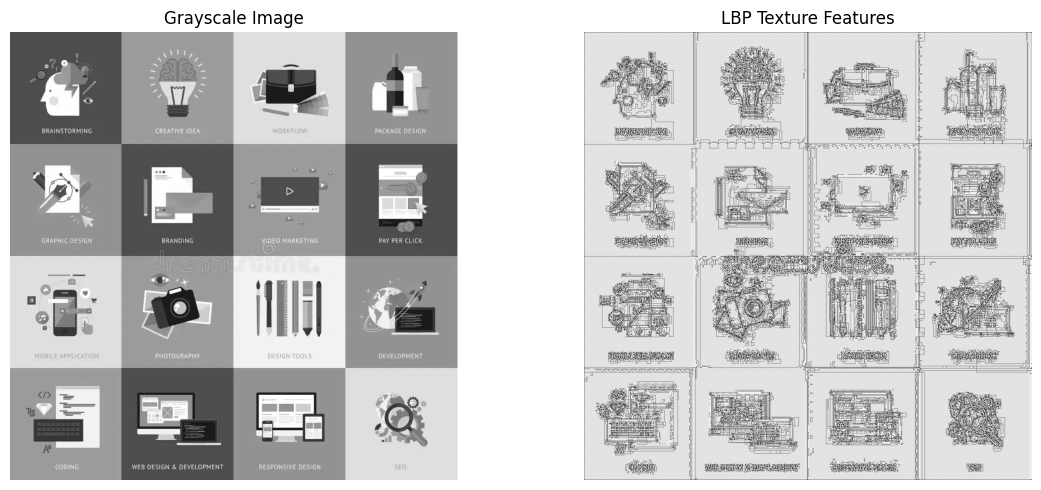

In [98]:
# Run the function
extract_texture_features(gray_image)

**Feature-4: Keypoint Detection (SIFT)**

**Technique:** Scale-Invariant Feature Transform (SIFT)

**Purpose:** Detects distinctive keypoints in the image that are invariant to scale, rotation, and illumination changes.

**Functionality:**

The SIFT algorithm identifies keypoints by analyzing regions in the image with distinct features (e.g., corners, edges, and blobs).

The keypoints are described by local descriptors that are robust to changes in scale and orientation.

The method detects the keypoints using a Difference of Gaussian (DoG) approach and computes their descriptors based on their local image patches.

SIFT keypoints can be visualized as points or circles on the image where the features are located.

**Applications:**

Object recognition: Used to identify objects within an image, even if the object is rotated, scaled, or viewed under different lighting conditions.

Image stitching: SIFT is useful in creating panoramic images by aligning multiple images based on common keypoints.

Feature-based image matching: SIFT is employed in matching corresponding points between different images, helpful in applications such as 3D reconstruction and visual tracking.

In [99]:
import cv2
import matplotlib.pyplot as plt

# Function to extract and visualize SIFT keypoints
def extract_keypoints(gray_image, image_rgb):
    # Create SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    keypoints, descriptors = sift.detectAndCompute(gray_image, None)

    # Draw keypoints on the RGB image
    sift_image = cv2.drawKeypoints(
        image_rgb, keypoints, None,
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )

    # Plot original and SIFT keypoint image
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Show original image
    axes[0].imshow(image_rgb)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # Show image with keypoints
    axes[1].imshow(sift_image)
    axes[1].set_title("SIFT Keypoints")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()


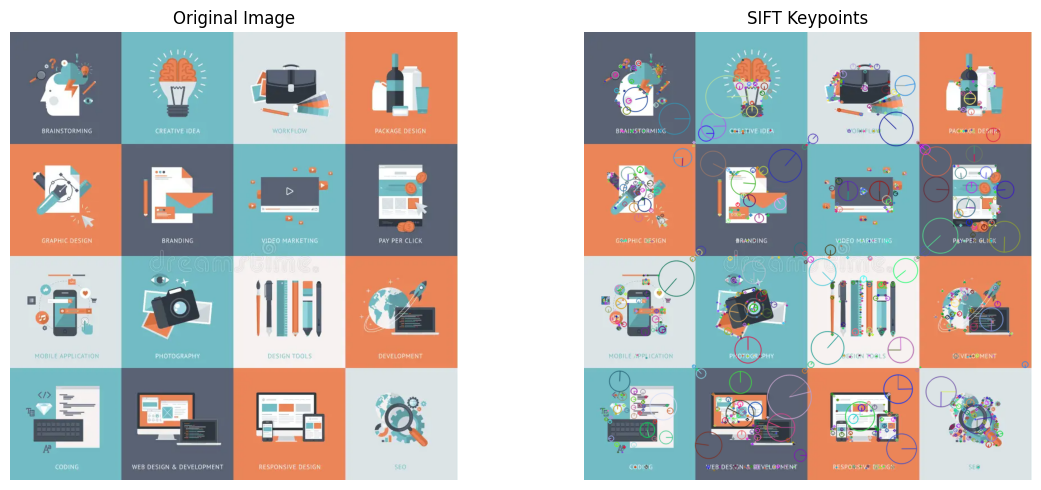

In [100]:
# Run the function
extract_keypoints(gray_image, image_rgb)

**Feature-5: Histogram of Oriented Gradients (HOG)**

**Technique:** Histogram of Oriented Gradients (HOG)

**Purpose:** Encodes shape and edge direction information to capture the structure of objects within an image.

**Functionality:**

The image is divided into small cells, and for each cell, the gradient magnitudes and orientations are calculated.

These orientations are quantized into histograms, which represent the distribution of gradient directions within each cell.

The histograms are then normalized across blocks to create a feature vector that captures the global structure of the image.

The result is a compact representation of the object’s shape and edges, which can be used for recognition tasks.

**Applications:**

Pedestrian detection: HOG features are widely used in detecting people in images or videos.

Object detection: Useful for detecting objects such as vehicles, animals, or faces in images.

Image classification: HOG is effective in distinguishing between different types of objects in an image, which aids in classifying images based on their visual content.



In [101]:
from skimage.feature import hog
import matplotlib.pyplot as plt

# Function to extract and visualize HOG features
def extract_hog_features(gray_image):
    # Extract HOG features and visualization image
    hog_features, hog_image = hog(
        gray_image,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        visualize=True,
        channel_axis=None
    )

    # Plot original and HOG feature images
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Show grayscale image
    axes[0].imshow(gray_image, cmap="gray")
    axes[0].set_title("Grayscale Image")
    axes[0].axis('off')

    # Show HOG visualization
    axes[1].imshow(hog_image, cmap="gray")
    axes[1].set_title("HOG Features")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()


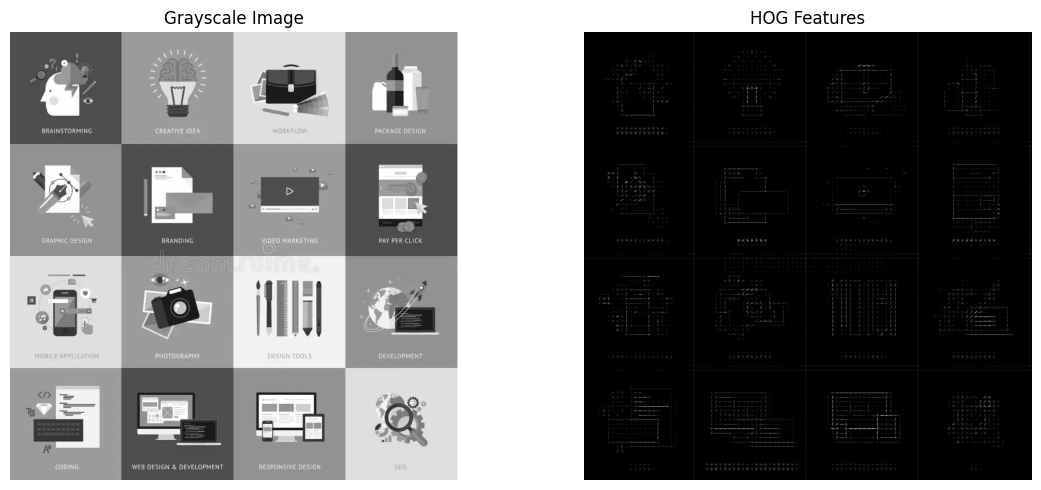

In [102]:
# Run the function
extract_hog_features(gray_image)

**Feature-6: Pre-Trained CNN (VGG16)**

**Technique:** Pre-Trained Convolutional Neural Network (VGG16)

**Purpose:** Extracts high-level semantic features using a deep learning model, specifically the VGG16 model, pre-trained on ImageNet data.

**Functionality:**

The VGG16 model is a deep convolutional neural network that has been trained on a large dataset (ImageNet) for object classification.

The model consists of 16 layers, including convolutional and pooling layers, which learn hierarchical features from the raw input image.

When used for feature extraction, the pre-trained VGG16 model outputs feature maps from its convolutional layers (excluding the fully connected layers).

The image is resized to match the input size required by VGG16 (224x224 pixels), and then the model processes the image to generate a high-dimensional feature tensor that captures complex patterns and semantics.

**Applications:**

Image classification: VGG16 is widely used for classifying images into predefined categories such as animals, objects, and scenes.

Object detection: VGG16 features are useful for detecting and recognizing objects in images as part of a larger object detection pipeline.

Transfer learning: Pre-trained VGG16 can be fine-tuned for specific tasks such as image segmentation or disease diagnosis by leveraging the learned features from large-scale datasets.

Feature extraction: VGG16 can be used as a feature extractor for various downstream tasks, such as image retrieval and style transfer.

In [103]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import cv2
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Function to extract and display deep features using VGG16
def extract_cnn_features(image_rgb):
    # Load pre-trained VGG16 model without the top classification layers
    model = VGG16(weights="imagenet", include_top=False)

    # Resize and preprocess image for VGG16 input
    resized_image = cv2.resize(image_rgb, (224, 224))
    image_array = np.expand_dims(resized_image, axis=0)
    image_array = preprocess_input(image_array)

    # Extract features from the image
    features = model.predict(image_array)

    # Create an image to display feature shape info
    text_image = Image.new('RGB', (400, 200), color='white')
    draw = ImageDraw.Draw(text_image)
    text_content = f"Feature Shape:\n{features.shape}"
    draw.text((20, 50), text_content, fill="black")

    # Convert PIL image to NumPy for display
    text_image_np = np.array(text_image)

    # Plot original image and feature info
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].imshow(image_rgb)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(text_image_np)
    axes[1].set_title("CNN Features (VGG16 Output Shape)")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step


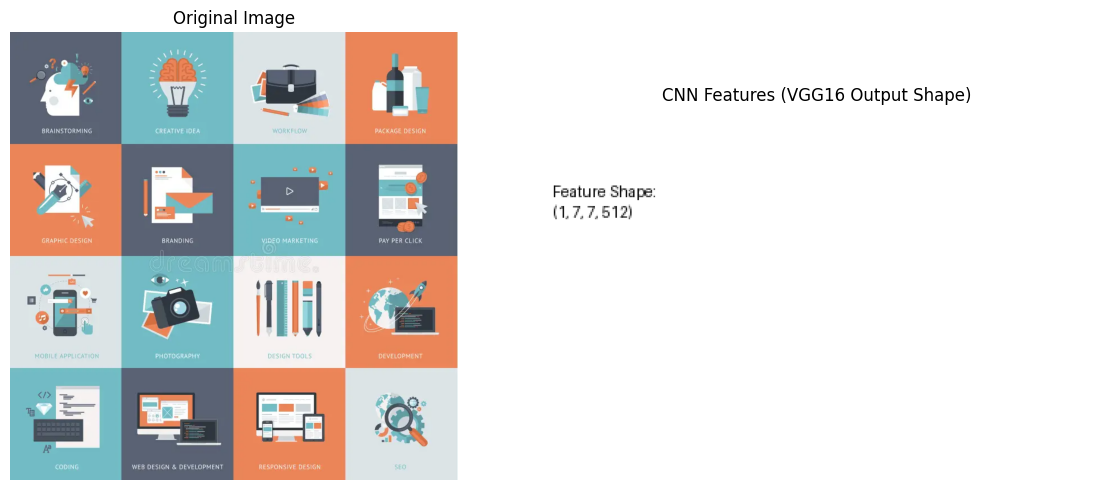

In [104]:
# Run the function
extract_cnn_features(image_rgb)

**Feature-7: Outline Feature Extraction**

**Technique:** Outline Feature Extraction

**Purpose:** Extracts the boundaries or outlines of objects within an image to represent their shapes.

**Functionality:**

The technique often uses edge detection algorithms (like Canny or Sobel) to identify the outlines of objects.

The outlines can be traced and visualized as separate features, providing a clear representation of the object shapes.

Some methods apply morphological operations such as dilation and erosion to enhance or refine the detected outlines.

**Applications:**

Object detection: Useful for extracting the shapes of objects, which can then be used for classification or recognition.

Shape analysis: Outlines are used to analyze the geometric properties of objects, such as area, perimeter, and orientation.

Medical image analysis: In fields like radiology, outline extraction is used to detect the boundaries of structures, such as tumors, organs, or bones.

Robotics and vision systems: Helps robots to understand the shapes and positions of objects in their environment for tasks like navigation or manipulation.

In [105]:
import cv2
import matplotlib.pyplot as plt

def extract_outline_features(gray_image, image_rgb):
    # Threshold the image to create a binary version
    _, binary = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on a copy of the original image
    outline_image = image_rgb.copy()
    cv2.drawContours(outline_image, contours, -1, (0, 255, 0), 2)

    # Plot original and outlined image
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow(image_rgb)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(outline_image)
    axes[1].set_title("Detected Outlines (Contours)")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()


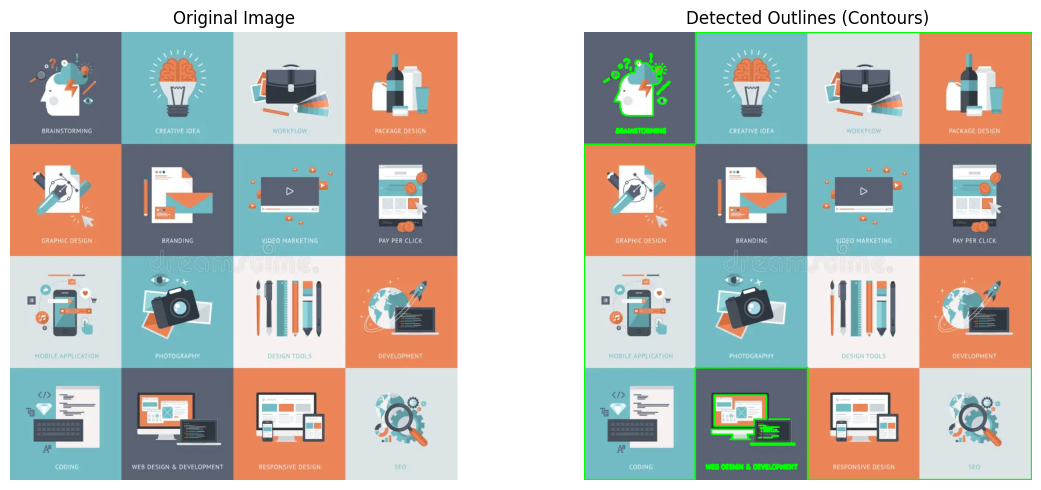

In [106]:
# Run the function
extract_outline_features(gray_image, image_rgb)

**Feature-8:Heatmap Feature Visualization**

**Technique:** Heatmap Feature Visualization

**Purpose:** Visualizes the importance or activation of features within an image, highlighting areas that contribute most to a particular outcome (e.g., classification).

**Functionality:**

Heatmaps are often generated using methods like Class Activation Mapping (CAM) or Grad-CAM, which show the regions of an image that have the most influence on the decision of a neural network.

The regions with higher importance are colored in warmer colors (e.g., red, yellow), while less important areas are colored cooler (e.g., blue).

This technique helps understand which parts of the image the model is focusing on to make predictions.

**Applications:**

Model interpretability: Heatmaps help to interpret black-box models (e.g., deep neural networks) by showing which parts of the image contributed to a specific decision.

Object localization: Helps in pinpointing the exact location of an object or feature within the image, often used in object detection tasks.

Medical image analysis: In medical imaging, heatmaps can be used to visualize the regions of interest, such as cancerous tissues or anomalies in radiographs.

Improving model performance: By visualizing the heatmap, we can fine-tune models by focusing on the important features and ignoring irrelevant areas.

In [107]:
import cv2
import matplotlib.pyplot as plt

def generate_heatmap_from_grayscale(gray_image):
    # Apply a heatmap using OpenCV
    heatmap = cv2.applyColorMap(gray_image, cv2.COLORMAP_JET)

    # Convert from BGR to RGB for Matplotlib
    heatmap_rgb = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Display the heatmap
    plt.figure(figsize=(6, 6))
    plt.imshow(heatmap_rgb)
    plt.title("Heatmap from Grayscale Image")
    plt.axis('off')
    plt.show()


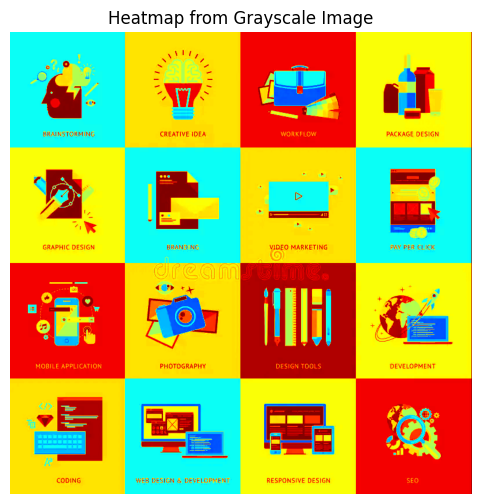

In [108]:
# Run the function
generate_heatmap_from_grayscale(gray_image)

**Feature-9: Color Moments**

**Technique:** Color Moments

**Purpose:** Extracts statistical moments (mean, variance, skewness) from the color distribution of an image to represent its color characteristics.

**Functionality:**

Color moments capture the basic statistical properties of color in an image:

First moment (mean): Represents the average color of the image.

Second moment (variance): Captures the spread or dispersion of colors in the image.

Third moment (skewness): Measures the asymmetry of the color distribution.

The moments are usually calculated for each color channel (Red, Green, Blue), and the resulting values provide a compact representation of the image's color content.

**Applications:**

Image retrieval: Color moments are used in content-based image retrieval systems to match images with similar color distributions.

Image classification: They provide a simple yet effective way to classify images based on their color properties.

Color-based segmentation: Color moments can be used to segment an image based on dominant color features, which is useful in applications like scene analysis and object detection.

Pattern recognition: Color moments are used in recognition tasks where color plays an important role, such as identifying fruits or flowers.

In [109]:
import numpy as np

def extract_color_moments(image_rgb):
    # Split channels
    R, G, B = cv2.split(image_rgb)

    def compute_moments(channel):
        mean = np.mean(channel)
        std = np.std(channel)
        skewness = np.mean((channel - mean)**3) / (std**3 + 1e-6)  # Avoid divide by zero
        return mean, std, skewness

    # Compute for each channel
    R_moments = compute_moments(R)
    G_moments = compute_moments(G)
    B_moments = compute_moments(B)

    print("Color Moments:")
    print(f"Red   - Mean: {R_moments[0]:.2f}, Std: {R_moments[1]:.2f}, Skewness: {R_moments[2]:.2f}")
    print(f"Green - Mean: {G_moments[0]:.2f}, Std: {G_moments[1]:.2f}, Skewness: {G_moments[2]:.2f}")
    print(f"Blue  - Mean: {B_moments[0]:.2f}, Std: {B_moments[1]:.2f}, Skewness: {B_moments[2]:.2f}")




In [110]:
# Run the function
extract_color_moments(image_rgb)

Color Moments:
Red   - Mean: 167.33, Std: 67.00, Skewness: -0.11
Green - Mean: 164.70, Std: 55.18, Skewness: -0.01
Blue  - Mean: 161.06, Std: 61.25, Skewness: 0.01


**Feature-10: Wavelet Transform Feature Extraction**

**Technique:** Wavelet Transform Feature Extraction

**Purpose:** Analyzes the image at multiple scales and orientations to extract both frequency and spatial information.

**Functionality:**

Wavelet transforms decompose an image into several frequency bands by applying a series of wavelet functions at different scales and positions.

The most commonly used wavelet transform is the Discrete Wavelet Transform (DWT), which produces a set of coefficients representing the approximation and detailed information at various levels.

This multi-resolution approach allows for capturing both high-frequency details (edges, textures) and low-frequency components (general shapes).

**Applications:**

Image compression: Wavelet transforms are used in image compression algorithms like JPEG2000, which take advantage of the multi-resolution features to reduce image size while maintaining quality.

Texture analysis: The wavelet coefficients provide information about the textures in an image, useful for texture classification tasks.

Image denoising: By analyzing and filtering out high-frequency noise components, wavelet transforms can enhance image quality.

Edge detection and feature extraction: Wavelet transforms can highlight edges and other important features in images, making it useful for object detection and segmentation tasks.



In [111]:
# Install PyWavelets
!pip install PyWavelets

# Import libraries
import pywt
import cv2
import matplotlib.pyplot as plt

# Function: Wavelet Feature Extraction
def extract_wavelet_features(gray_image):
    # Apply 2D Discrete Wavelet Transform (Haar wavelet)
    coeffs2 = pywt.dwt2(gray_image, 'haar')
    LL, (LH, HL, HH) = coeffs2

    # Display the sub-bands
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes[0, 0].imshow(LL, cmap='gray')
    axes[0, 0].set_title('Approximation (LL)')
    axes[0, 1].imshow(LH, cmap='gray')
    axes[0, 1].set_title('Horizontal Detail (LH)')
    axes[1, 0].imshow(HL, cmap='gray')
    axes[1, 0].set_title('Vertical Detail (HL)')
    axes[1, 1].imshow(HH, cmap='gray')
    axes[1, 1].set_title('Diagonal Detail (HH)')

    for ax in axes.flatten():
        ax.axis('off')

    plt.tight_layout()
    plt.show()


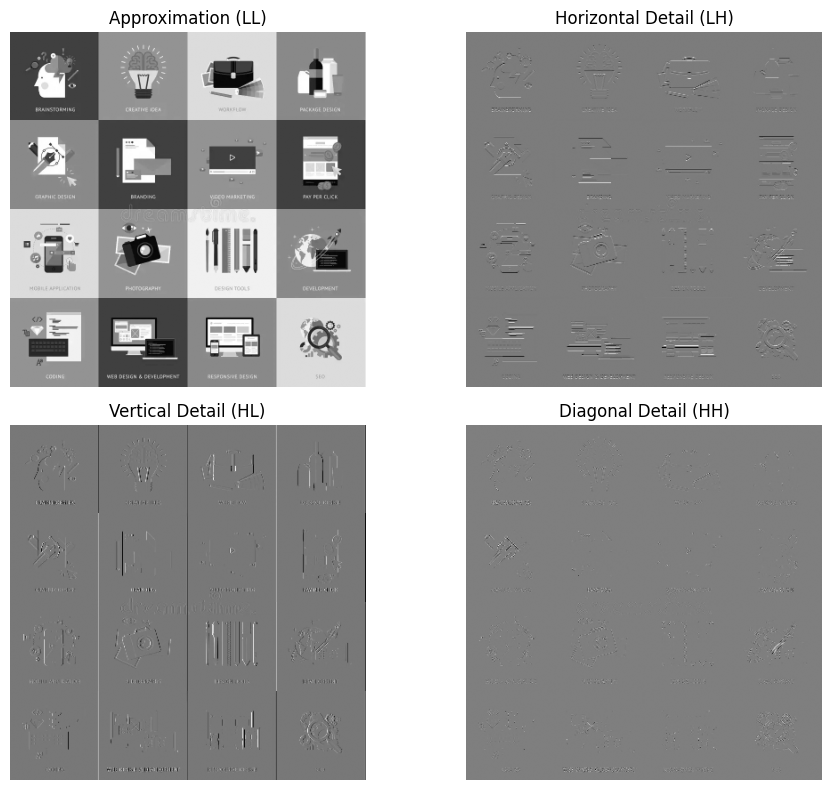

In [112]:
# Run the function
extract_wavelet_features(gray_image)